# Financial Transactions Data Analysis

### Import libraries

In [2]:
import pandas as pd

In [9]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

### To read the data

In [135]:
file_path = '/Users/megavishy/Downloads/fake_financial_transactions.csv'
df = pd.read_csv(file_path)

In [136]:
df.head()

,transaction_id,sender,receiver,transaction_amount,transaction_date,transaction_type
0,87f5d4dc-7eef-440a-a3e4-4b2b25c365ef,Gabriel Peterson,Heather Duran,440.15,2021-04-13,Debit
1,7046a5e1-fa4c-49e3-b292-e143b499b91b,Connor Bishop,Alex Jones,341.70,2015-05-26,Credit
2,4280a09d-1659-4d53-afc7-7c63365afe4a,Courtney Jones,Natasha Powell,307.33,2023-06-13,Debit
3,54f9b2b2-a5bb-4645-b09c-18cb1146246d,Gina Thompson,Andrew Potts,986.14,2022-11-22,Credit
4,a56c6dec-af98-479f-8b07-cac295ee3499,Melissa Lamb,Sonia Morales,634.62,2023-11-15,Credit


### Describe the data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      500 non-null    object 
 1   sender              500 non-null    object 
 2   receiver            500 non-null    object 
 3   transaction_amount  500 non-null    float64
 4   transaction_date    500 non-null    object 
 5   transaction_type    500 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.6+ KB


In [26]:
df.tail()

,transaction_id,sender,receiver,transaction_amount,transaction_date,transaction_type
495,0429eecc-ebd2-4867-9f8b-c560943dcc22,Angela Lawson,Henry Smith,308.24,2017-03-25,Debit
496,816dfab6-47b1-48cf-aa35-8314078d5250,Susan Perry,Joshua Vega,212.73,2019-02-07,Credit
497,46bd46f4-d19b-4bb0-a68a-ff9d72c2d3f7,Mr. Stephen Jarvis Jr.,Samuel Smith Jr.,355.84,2016-07-04,Credit
498,053368c8-52e9-4366-8bf7-8f8dbb9292a2,Katherine Jennings,Natasha Powell,818.34,2017-10-25,Debit
499,a174768d-7606-4892-b3fb-3573a6d8a003,Tracy Parks,Sonia Morales,626.08,2016-06-15,Debit


In [28]:
df.size

3000

In [33]:
df.columns

Index(['transaction_id', 'sender', 'receiver', 'transaction_amount',
       'transaction_date', 'transaction_type'],
      dtype='object')

In [37]:
df.describe()

,transaction_amount
count,500.000000
mean,522.686780
std,284.950305
min,11.490000
25%,282.562500
50%,556.095000
75%,742.107500
max,999.400000


### To count the values in transaction types

In [38]:
print(df.transaction_type.value_counts())

transaction_type
Credit    256
Debit     244
Name: count, dtype: int64


### To clean the data

In [39]:
# Check for missing values
print(df.isnull().sum())


transaction_id        0
sender                0
receiver              0
transaction_amount    0
transaction_date      0
transaction_type      0
dtype: int64


In [41]:
# Check for duplicate values
print(df.duplicated().sum())


0


Thus, the data is clean and there are no duplicate or null

## Exploratory Analysis

Text(0, 0.5, 'Total Transaction Amount')

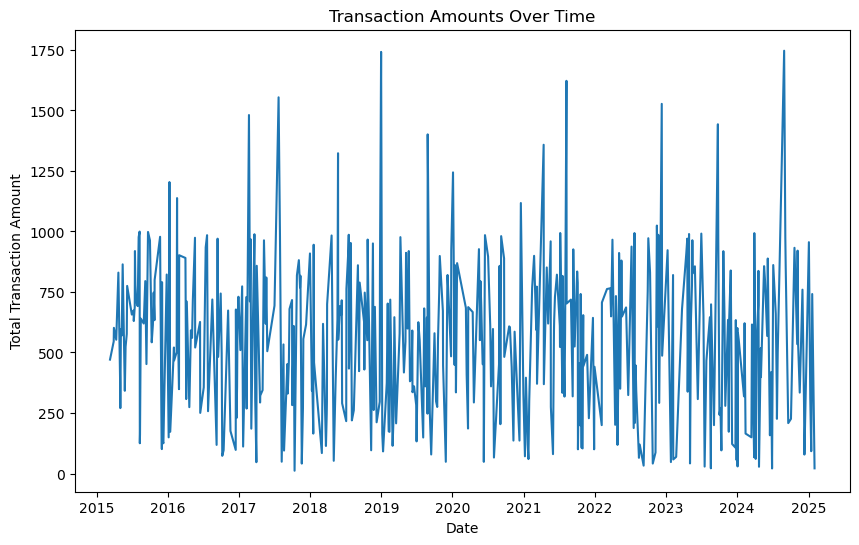

In [59]:
# frequency distribution
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
daily_totals = df.groupby(df['transaction_date'].dt.date)['transaction_amount'].sum()

daily_totals.plot(figsize = (10,6))
plt.title("Transaction Amounts Over Time")
plt.xlabel("Date")
plt.ylabel("Total Transaction Amount")

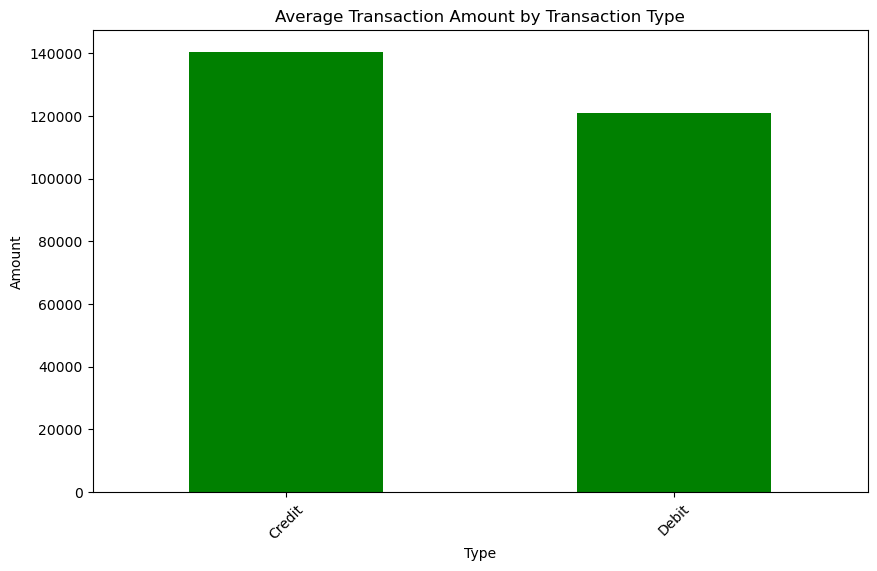

In [55]:
# bar plots
avg_amounts_by_type = df.groupby('transaction_type')['transaction_amount'].sum()
# plots
avg_amounts_by_type.plot( kind = 'bar', color = 'green', figsize = (10,6))
plt.title("Average Transaction Amount by Transaction Type")
plt.xlabel("Type")
plt.ylabel("Amount")
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'Histogram')

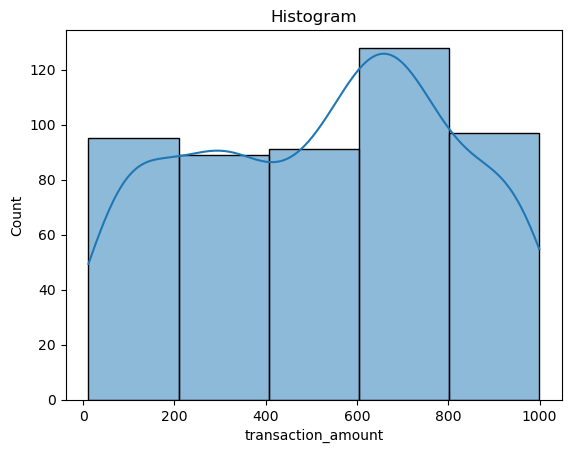

In [77]:
# Histogram
sns.histplot(df['transaction_amount'], bins = 5, kde = 'False')
plt.title("Histogram")

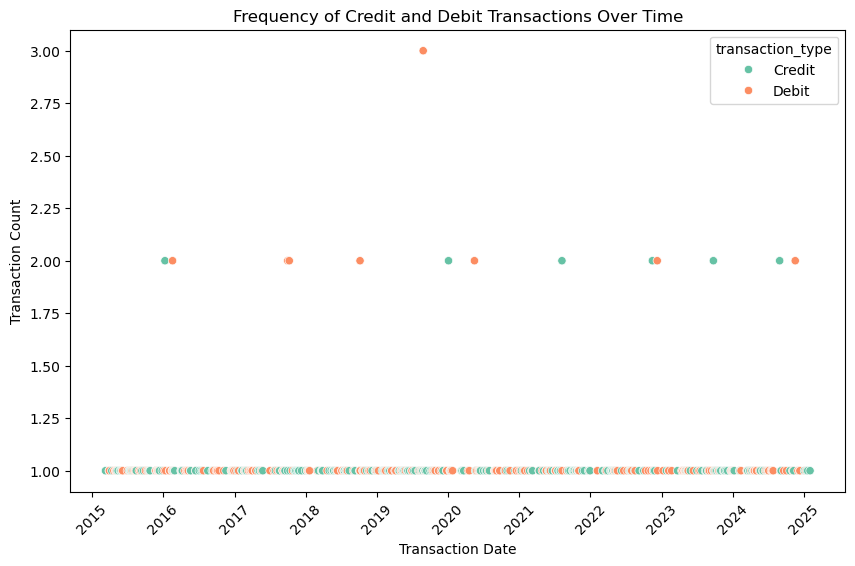

In [83]:
# scatter plots
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
filtered_df = df[df['transaction_type'].isin(['Credit','Debit'])]
daily_counts = filtered_df.groupby([filtered_df['transaction_date'].dt.date,'transaction_type']).size().reset_index(name = 'count')
plt.figure(figsize = (10,6))
sns.scatterplot(data = daily_counts, x = 'transaction_date', y = 'count', hue ='transaction_type', palette = 'Set2')
plt.title("Frequency of Credit and Debit Transactions Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()

/var/folders/ln/q3bkspps6tq803g7h04w_bhm0000gn/T/ipykernel_19941/1744995380.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = df, x = 'year', y = 'transaction_amount', palette = 'set2')


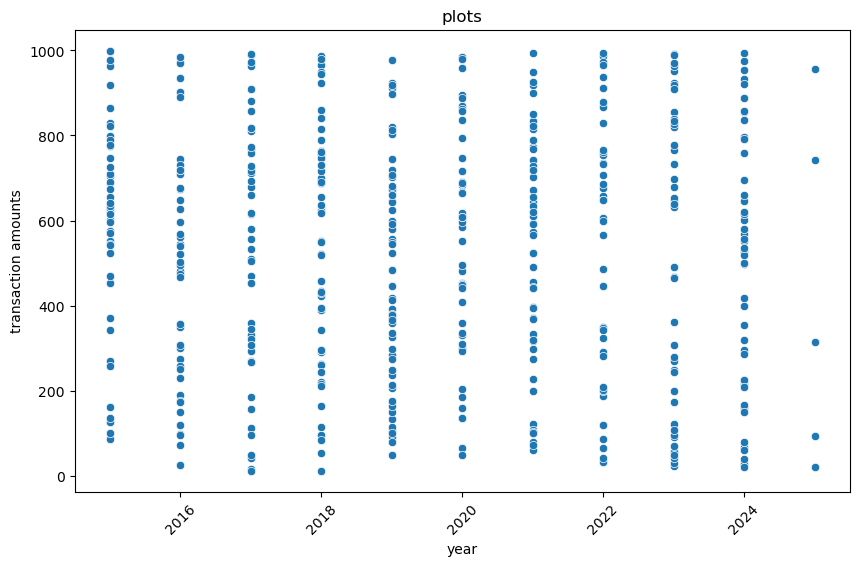

In [100]:
#scatter plots over years
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
years = df['year'].unique()
df['year'] = df['transaction_date'].dt.year
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'year', y = 'transaction_amount', palette = 'set2')
plt.title("plots")
plt.xlabel("year")
plt.ylabel("transaction amount")
plt.xticks(rotation = 45)
plt.show()

### Data Analysis

In [108]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [137]:
df['fraud_label'] = df['transaction_amount'].apply(lambda x: 1 if x > 900 else 0)

print(df['fraud_label'])

In [139]:
# Assume your dataframe 'df' contains a column named 'fraud_label' which indicates 
# whether a transaction is fraudulent (1 = fraud, 0 = not fraud).
# Ensure the 'fraud_label' column exists in your dataframe, or replace it with your actual column name.

# Features: Drop the 'fraud_label', 'transaction_id', SSS'sender', and 'receiver' columns
X = df.drop(columns=['fraud_label','transaction_date','transaction_type','transaction_id', 'sender', 'receiver'])  # Features

# Target: The 'fraud_label' column is the target variable
y = df['fraud_label']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using the classification report
# This will give precision, recall, and F1-score for each class (fraud vs non-fraud)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        91
           1       0.90      1.00      0.95         9

    accuracy                           0.99       100
   macro avg       0.95      0.99      0.97       100
weighted avg       0.99      0.99      0.99       100



## Inference

Thus it can be inferred that 99% of the data is non-fraudulent from this analysis, and the model is performing very well in detecting fraudulent transactions (with a recall of 1.00 for fraud detection). However, we need to keep in mind that accuracy can be misleading in highly imbalanced datasets because the model may still perform well on the dominant class (non-fraudulent), even if it's missing some fraudulent transactions.